In [1]:
# This code is based from the following:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html
# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause
#
# https://github.com/Fedzbar/deepfedz/blob/master/mnist.ipynb
# Author: Federico Barbero <fb548@cam.ac.uk>
# License: MIT License
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

from bbnet.nn import NeuralNet
from bbnet.layers import Linear, Tanh
from bbnet.train import train
from bbnet.data import MiniBatchStochastic
from bbnet.optimizers import GD

# Specify number of examples for testing
test_samples = 2500

In [2]:
# Load data from https://www.openml.org/d/554
print("Fetching mnist_784 data...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

Fetching mnist_784 data...


In [3]:
# Randomize and reshape data before taking training and test examples
print("Randomizing and reshaping data...")
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X.iloc[permutation].values
y = y.iloc[permutation].values
# Reshape from 28x28 matrix to list of 784 values per example
X = X.reshape((X.shape[0], -1))

# Scale data to range from 0.01 to 1.0
X = (X / 255.0 * 0.99) + 0.01

Randomizing and reshaping data...


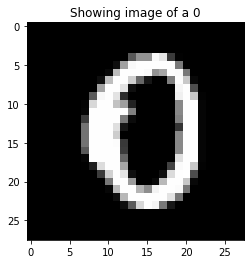

Raw estimates:
[[ 0.78403839  0.04067566 -0.12667848 -0.22665483  0.02560763  0.00261835
   0.17908539  0.10612408  0.09658124 -0.03066366]]
The network says it's a 0, the actual label is 0


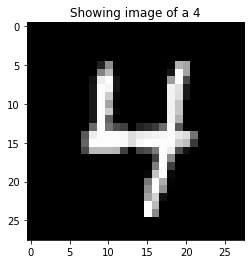

Raw estimates:
[[-0.07142987  0.01183629 -0.11643518 -0.07022143  0.82657087  0.37370524
  -0.0973913   0.10616923 -0.39098649  0.14969798]]
The network says it's a 4, the actual label is 4


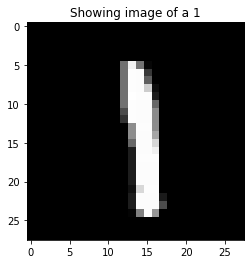

Raw estimates:
[[ 0.15309207  0.87297511 -0.12049155 -0.03838022 -0.14302431  0.1726329
  -0.01413306  0.17054204  0.01588948 -0.12857061]]
The network says it's a 1, the actual label is 1


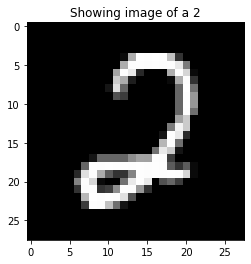

Raw estimates:
[[-0.10352555  0.03638139  0.57655942 -0.04141914 -0.16646225  0.27947671
   0.3100085   0.08826576 -0.03126373  0.15649621]]
The network says it's a 2, the actual label is 2


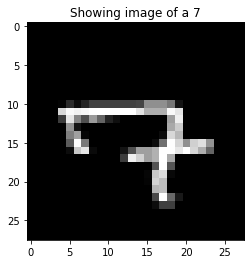

Raw estimates:
[[-0.12345219 -0.00919971 -0.13070855  0.2939336   0.51049775 -0.03530151
   0.21619603  0.35867793 -0.1336004   0.05274758]]
The network says it's a 4, the actual label is 7


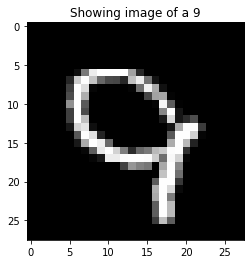

Raw estimates:
[[ 0.02314082  0.01307978  0.04749688 -0.03131894  0.06886921 -0.08827199
   0.33046895  0.12371567 -0.09625152  0.57650017]]
The network says it's a 9, the actual label is 9


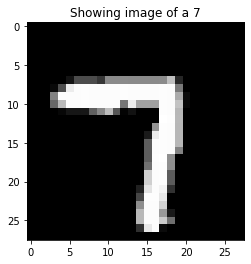

Raw estimates:
[[-0.14683091  0.04501961 -0.09945613 -0.01247159 -0.00410954  0.04907007
  -0.13308639  0.82877483  0.13962818  0.12335562]]
The network says it's a 7, the actual label is 7


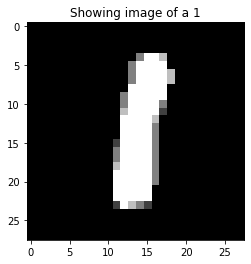

Raw estimates:
[[-0.12507221  0.87321337  0.02727014 -0.16189178 -0.29103484  0.23276154
  -0.17015021  0.16167927  0.30660673  0.11707933]]
The network says it's a 1, the actual label is 1


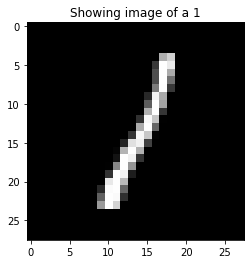

Raw estimates:
[[ 0.0064799   0.86133395 -0.0907906   0.00647071  0.17355795  0.10134557
   0.04776486 -0.13328907  0.04584903 -0.10977745]]
The network says it's a 1, the actual label is 1


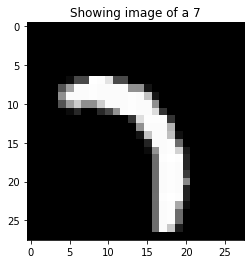

Raw estimates:
[[-0.15440203 -0.02535784  0.02727051 -0.02992792 -0.00140932  0.15219205
   0.0578823   0.45875007  0.2330413   0.2347188 ]]
The network says it's a 7, the actual label is 7


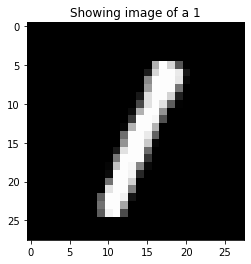

Raw estimates:
[[-0.11957235  0.8749847  -0.05587299 -0.15691394  0.19260769  0.05602601
  -0.14804188 -0.06771549  0.27497141  0.0009996 ]]
The network says it's a 1, the actual label is 1


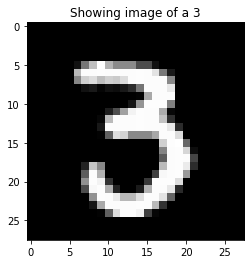

Raw estimates:
[[-0.04564738  0.00095971 -0.01154078  0.91986823 -0.04353501 -0.05535831
  -0.09877884  0.08931908 -0.19738146  0.00924033]]
The network says it's a 3, the actual label is 3


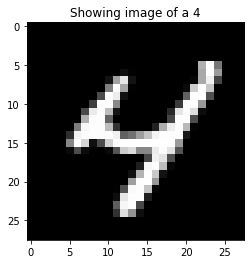

Raw estimates:
[[ 0.24027513  0.01167719 -0.2053831  -0.05049786  0.83730817 -0.16969008
   0.08551951  0.17111583  0.14709902 -0.25605226]]
The network says it's a 4, the actual label is 4


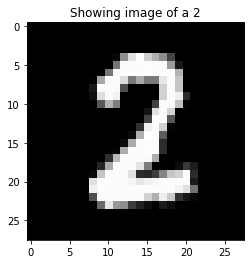

Raw estimates:
[[-0.04710115  0.03017949  0.85087816  0.18175806 -0.2521922   0.16666454
   0.02586981  0.02127954  0.10168014 -0.18719313]]
The network says it's a 2, the actual label is 2


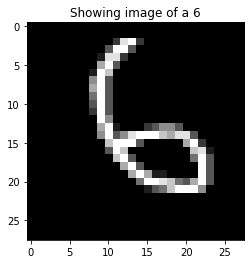

Raw estimates:
[[-0.07882688  0.10380698  0.56028283 -0.18735288  0.42503023  0.38528163
   0.00989335 -0.08587679 -0.06194409 -0.12187122]]
The network says it's a 2, the actual label is 6


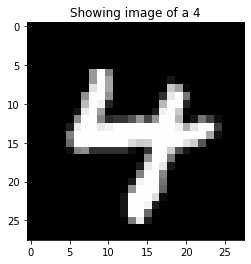

Raw estimates:
[[-0.02196092  0.0254568  -0.10952187  0.05650239  0.69398714  0.28781546
   0.10395843  0.08013257 -0.06405019 -0.13754619]]
The network says it's a 4, the actual label is 4


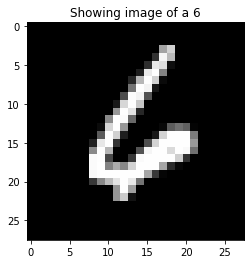

Raw estimates:
[[ 0.32627769  0.0396505  -0.07579681 -0.04048092  0.12681788  0.21417315
   0.53227483  0.02391118 -0.29395536  0.05151578]]
The network says it's a 6, the actual label is 6


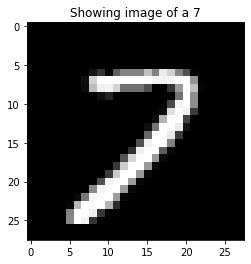

Raw estimates:
[[-0.0180255   0.06693934  0.06354101  0.05670067 -0.02308446 -0.06346918
   0.0857971   0.76846688 -0.0827302   0.06463301]]
The network says it's a 7, the actual label is 7


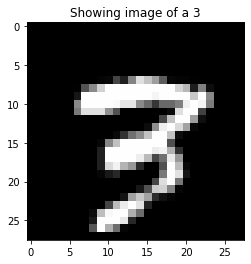

Raw estimates:
[[-0.18022634  0.03014232  0.05144464 -0.01122197  0.31375586  0.03816896
  -0.10272075  0.22410205  0.16834375  0.47730996]]
The network says it's a 9, the actual label is 3


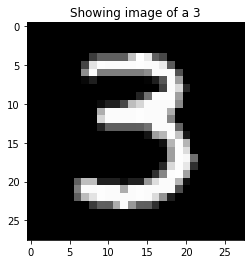

Raw estimates:
[[-0.09600956  0.02541667 -0.0447471   0.88760275 -0.04186537 -0.00429767
  -0.08458589 -0.09570983  0.01965539  0.0913509 ]]
The network says it's a 3, the actual label is 3


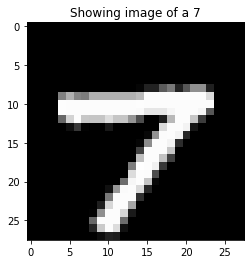

Raw estimates:
[[ 0.08280244  0.04286944 -0.06046084  0.02759839  0.35956343  0.23478859
  -0.15088003  0.46147105  0.04873634 -0.13200547]]
The network says it's a 7, the actual label is 7


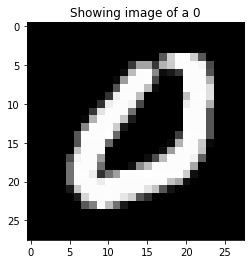

Raw estimates:
[[ 0.81226607  0.02548039  0.10698585 -0.08461831  0.00169889  0.21189819
   0.082207    0.1079471  -0.2384449  -0.20842841]]
The network says it's a 0, the actual label is 0


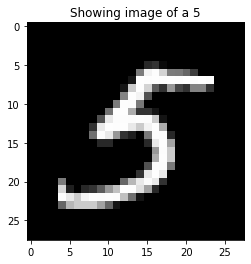

Raw estimates:
[[-0.08177418  0.03865455 -0.22048572  0.09978419 -0.07510423  0.64892984
   0.28432342 -0.04969641 -0.31204698  0.55781416]]
The network says it's a 5, the actual label is 5


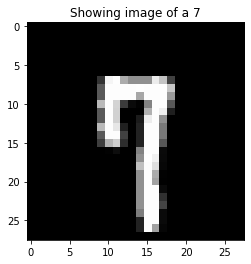

Raw estimates:
[[ 0.07794408 -0.07188084  0.10854864 -0.07959516 -0.16441969  0.08418863
  -0.04116294  0.39214563  0.21787674  0.54039195]]
The network says it's a 9, the actual label is 7


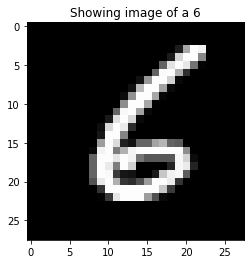

Raw estimates:
[[ 0.15858453  0.0696616   0.4372998  -0.14869733  0.03231796  0.24985088
   0.5779226  -0.209907    0.1534079  -0.29965512]]
The network says it's a 6, the actual label is 6


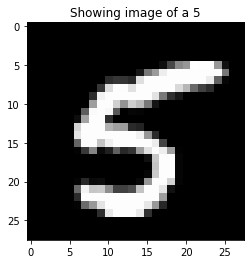

Raw estimates:
[[-1.33084254e-04  1.63152842e-02 -1.33365408e-01  6.31651457e-02
  -6.79223461e-02  8.87153056e-01 -1.14908616e-01 -6.70544233e-02
  -3.44624200e-02 -3.23271604e-04]]
The network says it's a 5, the actual label is 5


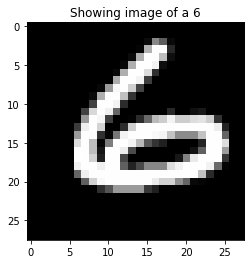

Raw estimates:
[[ 0.14219736  0.0760785   0.49331863 -0.16940385  0.03439021  0.22851499
   0.57956708 -0.21607183 -0.48612881  0.3614138 ]]
The network says it's a 6, the actual label is 6


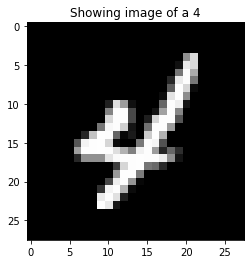

Raw estimates:
[[ 0.07652369  0.09759428  0.06213139 -0.02767145  0.72677235 -0.1335971
   0.20788278 -0.09148643 -0.23321004  0.12686195]]
The network says it's a 4, the actual label is 4


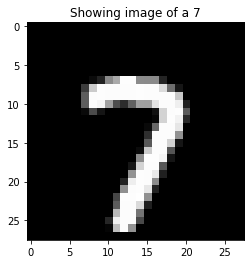

Raw estimates:
[[-0.17011949 -0.03322508  0.07170171  0.01022282  0.04949029  0.13748952
  -0.02085815  0.87851656 -0.12648988 -0.04902645]]
The network says it's a 7, the actual label is 7


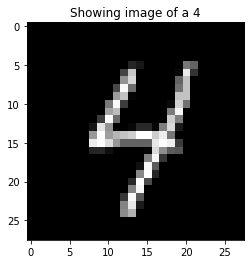

Raw estimates:
[[-0.00508332  0.06790069 -0.13279608 -0.04905326  0.28670161 -0.08373772
   0.28516611 -0.02712866  0.1747079   0.56098144]]
The network says it's a 9, the actual label is 4


In [8]:
# Perform predictions on mnist data
for test_element_number in range(0, 30):
    input_example = X[test_element_number]
    label_example = y[test_element_number]

    plt.title(f"Showing image of a {label_example}")
    plt.imshow(input_example.reshape(28,28), cmap='gray')
    plt.show()
    
    model = pickle.load(open('models/mnist_net.p', 'rb'))
    print('Raw estimates:')
    pred = model.forward(input_example)
    print(pred)

    clean_pred = pred.argmax()
    print(f"The network says it's a {clean_pred}, the actual label is {label_example}")